In [27]:
%pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("heart_data.csv")
print(df.head())

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   NaN    1   3       145   233    1        0      150      0      2.3   
1  37.0    1   2       130   250    0        1      187      0      3.5   
2  41.0    0   1       130   204    0        0      172      0      1.4   
3  56.0    1   1       120   236    0        1      178      0      0.8   
4  57.0    0   0       120   354    0        1      163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  


In [30]:
#counts the number of null values in each columns
df.isnull().sum()

age         1
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [31]:
#drops all the null value
df.dropna(inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41.0,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57.0,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [32]:
#will remove the full column of the column name specified
# in this the target column is removed from the data frame
x=df.drop('target', axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41.0,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57.0,1,0,140,192,0,1,148,0,0.4,1,0,1


In [33]:
y = df['target']
y.tail()


298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [34]:
y.head()

1    1
2    1
3    1
4    1
5    1
Name: target, dtype: int64

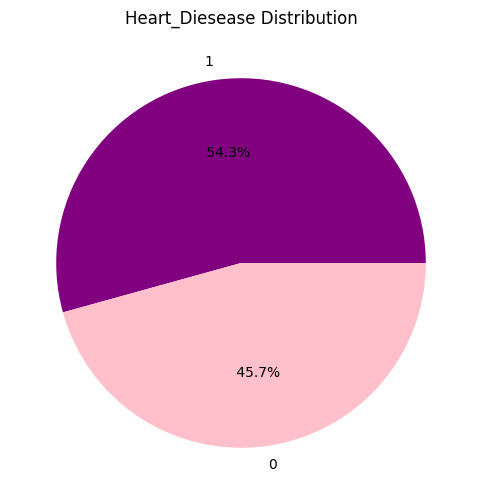

In [35]:
# pie chart to see % of having heart disease and not having heart disease
plt.figure(figsize=(6,6))
df['target'].value_counts().plot.pie(autopct="% 1.1f%%", colors = ['purple','pink'])
plt.title("Heart_Diesease Distribution")
plt.ylabel("")
plt.show()

Note: you may need to restart the kernel to use updated packages.


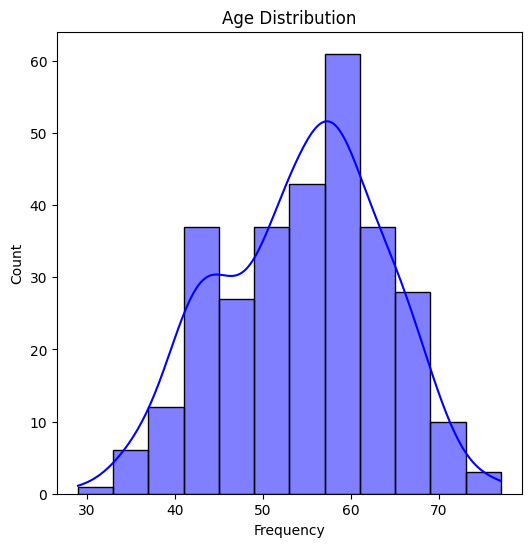

In [36]:
%pip install seaborn
import seaborn as sns
plt.figure(figsize=(6,6))
sns.histplot(df['age'], kde = True, color ='blue')
plt.title('Age Distribution')
plt.xlabel('Frequency')
plt.show()

In [37]:
#logistic regressiom model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [38]:
#train-test-split will take the data and split eg-(80% for training and 20% for testing), this will return 4 values...for storing those 4 values we create the following -
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

In [39]:
#x_test and y_test will have the data for testing(here we selected 0.2 ie 20%)
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
293,67.0,1,2,152,212,0,0,150,0,0.8,1,0,3
133,41.0,1,1,110,235,0,1,153,0,0.0,2,0,2
115,37.0,0,2,120,215,0,1,170,0,0.0,2,0,2
226,62.0,1,1,120,281,0,0,103,0,1.4,1,1,3
136,60.0,0,2,120,178,1,1,96,0,0.0,2,0,2


In [40]:
#like commented above - y has the corresponding values for the x_test data
y_test.head()


293    0
133    1
115    1
226    0
136    1
Name: target, dtype: int64

In [41]:
# x_train and y_train has the training data(the remaning 80% random data) for training the data
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42.0,1,1,120,295,0,1,162,0,0.0,2,0,2
37,54.0,1,2,150,232,0,0,165,0,1.6,2,0,3
301,57.0,1,0,130,131,0,1,115,1,1.2,1,1,3
45,52.0,1,1,120,325,0,1,172,0,0.2,2,0,2
217,63.0,1,0,130,330,1,0,132,1,1.8,2,3,3


In [42]:
#corresponding y value for x_train data
y_train.head()

132    1
37     1
301    0
45     1
217    0
Name: target, dtype: int64

In [43]:
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scalert = scaler.transform(x_test)
print(x_train_scaler[0])
print(x_train_scaler[1])


[-1.29462865  0.63980991  0.02792148 -0.64388543  1.02264865 -0.43265704
  0.8752137   0.51032759 -0.67867965 -0.90496317  1.00991545 -0.70845356
 -0.55647279]
[ 0.04540931  0.63980991  0.98921827  1.07710963 -0.25865804 -0.43265704
 -1.00805864  0.64107417 -0.67867965  0.45867028  1.00991545 -0.70845356
  1.07901432]


In [44]:
log_regrestion = LogisticRegression()
log_regrestion.fit(x_train_scaler, y_train) # y_train is the targeted data for x_train
# this created model , that has to be stored in pkl file
#.pkl file ....

LogisticRegression()

In [45]:
#pkl
import pickle
with open ('log_reg.pkl',mode = 'wb') as s: # for storing we use this)
    pickle.dump(log_regrestion,s)


In [46]:
#also store a scaler model
with open('scaler.pkl', mode = 'wb') as f:
    pickle.dump(scaler,f)

In [47]:
print(x_test.head())
print(y_test.head())

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
293  67.0    1   2       152   212    0        0      150      0      0.8   
133  41.0    1   1       110   235    0        1      153      0      0.0   
115  37.0    0   2       120   215    0        1      170      0      0.0   
226  62.0    1   1       120   281    0        0      103      0      1.4   
136  60.0    0   2       120   178    1        1       96      0      0.0   

     slope  ca  thal  
293      1   0     3  
133      2   0     2  
115      2   0     2  
226      1   1     3  
136      2   0     2  
293    0
133    1
115    1
226    0
136    1
Name: target, dtype: int64


In [48]:
test_arr = np.array(x_test)
print(test_arr)

[[6.70e+01 1.00e+00 2.00e+00 1.52e+02 2.12e+02 0.00e+00 0.00e+00 1.50e+02
  0.00e+00 8.00e-01 1.00e+00 0.00e+00 3.00e+00]
 [4.10e+01 1.00e+00 1.00e+00 1.10e+02 2.35e+02 0.00e+00 1.00e+00 1.53e+02
  0.00e+00 0.00e+00 2.00e+00 0.00e+00 2.00e+00]
 [3.70e+01 0.00e+00 2.00e+00 1.20e+02 2.15e+02 0.00e+00 1.00e+00 1.70e+02
  0.00e+00 0.00e+00 2.00e+00 0.00e+00 2.00e+00]
 [6.20e+01 1.00e+00 1.00e+00 1.20e+02 2.81e+02 0.00e+00 0.00e+00 1.03e+02
  0.00e+00 1.40e+00 1.00e+00 1.00e+00 3.00e+00]
 [6.00e+01 0.00e+00 2.00e+00 1.20e+02 1.78e+02 1.00e+00 1.00e+00 9.60e+01
  0.00e+00 0.00e+00 2.00e+00 0.00e+00 2.00e+00]
 [6.30e+01 0.00e+00 0.00e+00 1.08e+02 2.69e+02 0.00e+00 1.00e+00 1.69e+02
  1.00e+00 1.80e+00 1.00e+00 2.00e+00 2.00e+00]
 [5.80e+01 1.00e+00 0.00e+00 1.46e+02 2.18e+02 0.00e+00 1.00e+00 1.05e+02
  0.00e+00 2.00e+00 1.00e+00 1.00e+00 3.00e+00]
 [5.60e+01 1.00e+00 1.00e+00 1.30e+02 2.21e+02 0.00e+00 0.00e+00 1.63e+02
  0.00e+00 0.00e+00 2.00e+00 0.00e+00 3.00e+00]
 [5.80e+01 1.00e+00 1.00

In [49]:
test_scaler = scaler.transform(test_arr)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
#load this model
#rb - reading file
with open("log_reg.pkl",mode= 'rb') as f:
    logreg_model = pickle.load(f)
with open ("scaler.pkl",mode ='rb') as f:
    scal_model = pickle.load(f)
    

In [51]:
# run prediction (1 stands for having heart disease, 0 stands for not having heart disease)
predict_logreg = logreg_model.predict(test_scaler)
print(x_test.head())
print(predict_logreg)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
293  67.0    1   2       152   212    0        0      150      0      0.8   
133  41.0    1   1       110   235    0        1      153      0      0.0   
115  37.0    0   2       120   215    0        1      170      0      0.0   
226  62.0    1   1       120   281    0        0      103      0      1.4   
136  60.0    0   2       120   178    1        1       96      0      0.0   

     slope  ca  thal  
293      1   0     3  
133      2   0     2  
115      2   0     2  
226      1   1     3  
136      2   0     2  
[0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0]


In [52]:
#check the matrix performance
#find the accuracy of the model - by comparing the original data(y_test) with the predicted data(predict_logreg)
acc_logreg = accuracy_score(y_test,predict_logreg)
print(acc_logreg)

0.8688524590163934


In [53]:
classificationreport = classification_report(y_test, predict_logreg)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.86      0.91      0.89        35

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



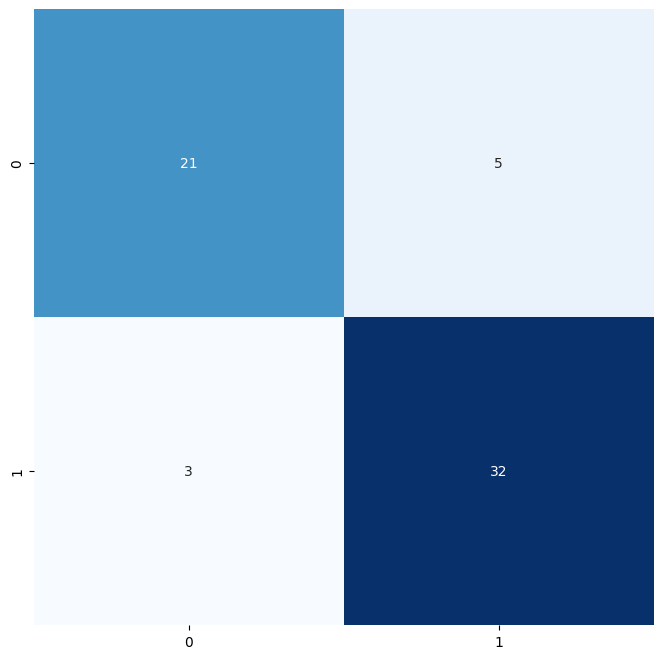

In [54]:
plt.figure(figsize =(8,8))
cm = confusion_matrix(y_test,predict_logreg)
sns.heatmap(cm,annot = True, cmap = 'Blues',cbar=False)
plt.show()